# Student Details

- **Name:** Pranav Arora
- **Student #:** 202286040
- **Email:** parora@mun.ca
- **Course:** COMP6934 Data Visualization
- **Assignment:** 1

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Fetching data from the given datasets

In [2]:
df_pp = pd.read_csv('plastic-production.csv')
df_pp.head()

,Applications,Time,Value
0,Other,1990,19.433
1,Other,1991,20.160
2,Other,1992,21.440
3,Other,1993,22.333
4,Other,1994,24.513


In [3]:
df_rp = pd.read_csv('river-plastics.csv')
df_rp.head()

,Country or administrative area,Area,Coast length,Rainfall,MPW,ME,Ratio ME/MPW
0,Albania,28486,362,1117,69833,1565,2.24
1,Algeria,2316559,998,80,764578,5774,0.76
2,Angola,1247357,1600,1025,236946,860,0.36
3,Antigua and Barbuda,443,153,996,627,2,0.29
4,Argentina,2779705,4989,567,465808,4137,0.89


### Getting initial data insights in Plastic Production dataset

- There are no null values and also got some insight about the data type of each column. 
- Time data type was changed while parsing dates in read_csv

In [4]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Applications  420 non-null    object 
 1   Time          420 non-null    int64  
 2   Value         420 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.0+ KB


### Statistical Insights

- The Plastic Production dataset seems to be skewed as the major amount of production seems to be at the later years in the dataset (Value: 41.97 in the 3rd quartile)

In [5]:
df_pp.describe()

,Time,Value
count,420.000000,420.000000
mean,2004.500000,40.958717
std,8.665764,78.077021
min,1990.000000,0.007000
25%,1997.000000,1.750750
50%,2004.500000,14.213000
75%,2012.000000,41.974750
max,2019.000000,459.746000


Since _Applications_ column has object data type, I used `df.unique()` and `df.nunique()` to know about the sectors' column 

In [6]:
df_pp['Applications'].nunique()

14

In [7]:
df_pp['Applications'].unique()

array(['Other', 'Packaging', 'Consumer & institutional Products',
       'Building & construction', 'Electrical/electronics',
       'Transportation - other', 'Marine coatings',
       'Industrial/machinery', 'Personal care products',
       'Textile sector - clothing', 'Textile sector - others',
       'Road marking', 'Transportation - tyres', 'Total'], dtype=object)

- The Total is included in the Applications sector so we will exclude that and then feed it into groupby API.

In [8]:
df_yly_sec_prod = df_pp.loc[df_pp['Applications'] != 'Total']
df_yly_sec_prod

,Applications,Time,Value
0,Other,1990,19.433
1,Other,1991,20.160
2,Other,1992,21.440
3,Other,1993,22.333
4,Other,1994,24.513
...,...,...,...
385,Transportation - tyres,2015,7.100
386,Transportation - tyres,2016,7.164
387,Transportation - tyres,2017,7.300
388,Transportation - tyres,2018,7.522


## Answer 1

- Using groupby to calculate the total production of each sector yearly

In [9]:
df_yly_sec_prod = df_yly_sec_prod.groupby(['Applications', 'Time']).sum().reset_index()
df_yly_sec_prod

,Applications,Time,Value
0,Building & construction,1990,21.872
1,Building & construction,1991,22.684
2,Building & construction,1992,24.119
3,Building & construction,1993,25.116
4,Building & construction,1994,27.558
...,...,...,...
385,Transportation - tyres,2015,7.100
386,Transportation - tyres,2016,7.164
387,Transportation - tyres,2017,7.300
388,Transportation - tyres,2018,7.522


In [10]:
df_yly_sec_prod['Value'].sum()

8601.332

- Checking the sum of all Totals from the original `df_pp` dataset.

In [11]:
df_pp.loc[df_pp['Applications'] == 'Total'].sum().Value

8601.329

- Confirmation by equating the total production from `df_yly_sec_prod` and original `df_pp`

In [12]:
df_yly_sec_prod['Value'].sum() - df_pp.loc[df_pp['Applications'] == 'Total'].sum().Value

0.0030000000006111804

## Answer 2

- Time (x) would be same for all the sectors/Applications
- Value (y) is filtered based on different sectors/Applications

`plt.plot(x,y, label, color, linestyle)`

- Used Functional Interface

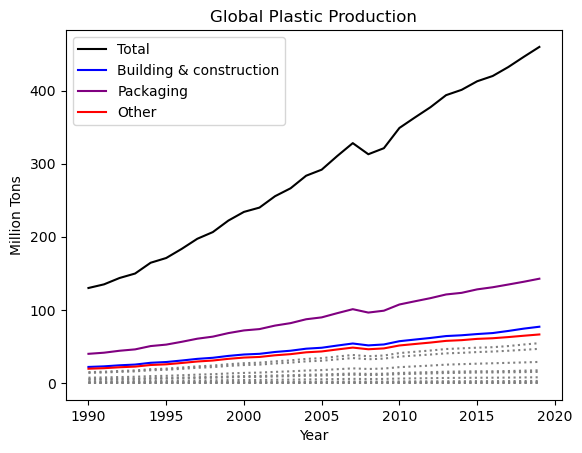

In [13]:
x = df_pp[df_pp.Applications == 'Total']['Time']

plt.plot(x,df_pp[df_pp.Applications == 'Total']['Value'], label='Total', color='black')
plt.plot(x,df_pp[df_pp.Applications == 'Building & construction']['Value'], label='Building & construction', color='blue')
plt.plot(x,df_pp[df_pp.Applications == 'Packaging']['Value'], label='Packaging', color='purple')
plt.plot(x,df_pp[df_pp.Applications == 'Other']['Value'], label='Other', color='red')
plt.plot(x,df_pp[df_pp.Applications == 'Consumer & institutional Products']['Value'], color='grey', linestyle=':')
plt.plot(x,df_pp[df_pp.Applications == 'Electrical/electronics']['Value'], color='grey',linestyle=':')
plt.plot(x,df_pp[df_pp.Applications == 'Transportation - other']['Value'], color='grey',linestyle=':')
plt.plot(x,df_pp[df_pp.Applications == 'Marine coatings']['Value'], color='grey',linestyle=':')
plt.plot(x,df_pp[df_pp.Applications == 'Industrial/machinery']['Value'], color='grey',linestyle=':')
plt.plot(x,df_pp[df_pp.Applications == 'Personal care products']['Value'], color='grey',linestyle=':')
plt.plot(x,df_pp[df_pp.Applications == 'Textile sector - clothing']['Value'], color='grey',linestyle=':')
plt.plot(x,df_pp[df_pp.Applications == 'Textile sector - others']['Value'], color='grey',linestyle=':')
plt.plot(x,df_pp[df_pp.Applications == 'Road marking']['Value'], color='grey',linestyle=':')
plt.plot(x,df_pp[df_pp.Applications == 'Transportation - tyres']['Value'], color='grey',linestyle=':')

plt.title('Global Plastic Production')
plt.xlabel('Year')
plt.ylabel('Million Tons')
plt.legend(loc='upper left')
plt.show()

### Prepping up for Answer 3

- Getting to know `river_plastics.csv` dataset
- Used `df_rp.describe` to know the distribution of data and `df_rp.info()` to know the data type and null values in the dataset

In [14]:
df_rp

,Country or administrative area,Area,Coast length,Rainfall,MPW,ME,Ratio ME/MPW
0,Albania,28486,362,1117,69833,1565,2.24
1,Algeria,2316559,998,80,764578,5774,0.76
2,Angola,1247357,1600,1025,236946,860,0.36
3,Antigua and Barbuda,443,153,996,627,2,0.29
4,Argentina,2779705,4989,567,465808,4137,0.89
...,...,...,...,...,...,...,...
158,Venezuela,912557,2800,1875,671431,5988,0.89
159,Vietnam,327732,3444,1772,1112790,28221,2.54
160,Western Sahara,266830,111,35,4114,38,0.91
161,Yemen,419900,1906,112,291737,252,0.09


In [15]:
df_rp.describe()

,Area,Coast length,Rainfall,MPW,ME,Ratio ME/MPW
count,1.630000e+02,163.000000,163.000000,1.630000e+02,163.000000,163.000000
mean,7.277222e+05,4315.852761,1235.957055,3.789798e+05,6008.944785,2.370798
std,2.054834e+06,17164.869315,834.378273,1.469056e+06,30954.200425,3.364537
min,8.000000e+00,4.000000,20.000000,3.000000e+00,0.000000,0.000000
25%,1.434650e+04,283.500000,597.500000,1.716500e+03,8.000000,0.175000
50%,1.113000e+05,648.000000,1090.000000,2.169300e+04,235.000000,0.960000
75%,4.557010e+05,2442.000000,1795.000000,2.154820e+05,1515.000000,3.205000
max,1.694540e+07,202080.000000,3821.000000,1.299410e+07,356371.000000,19.360000


- The data seem to be skewed

In [16]:
df_rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country or administrative area  163 non-null    object 
 1   Area                            163 non-null    int64  
 2   Coast length                    163 non-null    int64  
 3   Rainfall                        163 non-null    int64  
 4   MPW                             163 non-null    int64  
 5   ME                              163 non-null    int64  
 6   Ratio ME/MPW                    163 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 9.0+ KB


## Answer 3

- Used Object Oriented API for Answer 3

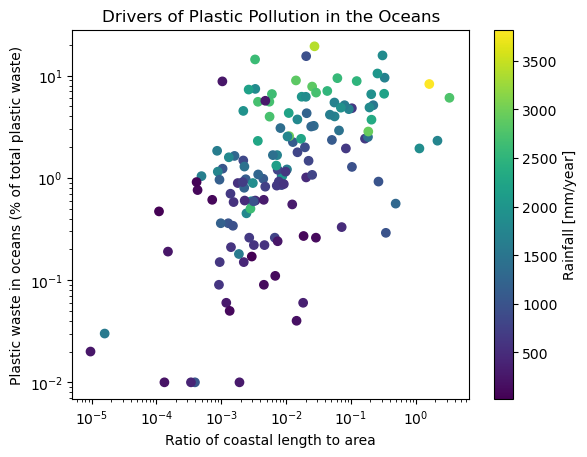

In [17]:
fig, ax = plt.subplots()

x_coast_to_area = df_rp['Coast length']/df_rp['Area'] # Getting the ratio of coast length to area

# x=ratio of coast length to area, y=ratio of ME/MPW, color map= rainfall
rp_scatter = ax.scatter(x_coast_to_area, df_rp['Ratio ME/MPW'], c=df_rp['Rainfall'])
fig.colorbar(rp_scatter, ax=ax, label="Rainfall [mm/year]")

# Setting up the labels
ax.set_xlabel("Ratio of coastal length to area")
ax.set_ylabel("Plastic waste in oceans (% of total plastic waste)")
ax.set_title("Drivers of Plastic Pollution in the Oceans")

# Converting the scale to log since the distribution is skewed
ax.loglog()

plt.show()

### Attributions

- Pandas Groupby: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
- Pandas read_csv and parse_dates: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv
- Functional API Matplotlib: lecture5.ipynb
- Object Oriented API Matplotlib: lecture6.ipynb
- Scatter plots: https://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut3.html